In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BankNote_Authentication.csv')

# Display the first few rows of the dataset
df.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values


variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [4]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

duplicate_rows


24

In [5]:
# Remove duplicate rows
data_cleaned = df.drop_duplicates()

# Check the shape of the cleaned dataset
data_shape = data_cleaned.shape

data_shape


(1348, 5)

In [6]:
# Check the data types of each column
data_types = data_cleaned.dtypes

data_types


variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [9]:
# Save the cleaned data to a new CSV file
cleaned_file_path = "BankNote_cleaned.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'BankNote_cleaned.csv'

In [11]:
# Load the cleaned dataset
encodedata = pd.read_csv('BankNote_cleaned.csv')

# Display the first few rows of the dataset
encodedata.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


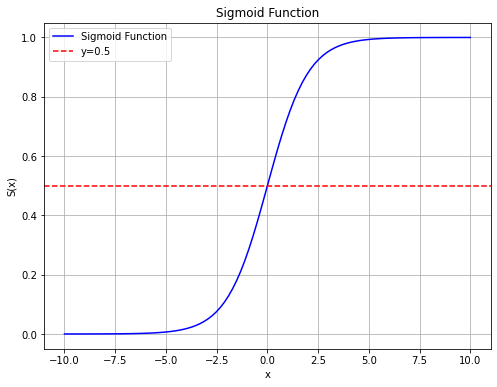

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoidfunction(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute the corresponding y values using the sigmoid function
y_values = sigmoidfunction(x_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")
plt.axhline(0.5, color="red", linestyle="--", label="y=0.5")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.grid(True)
plt.show()


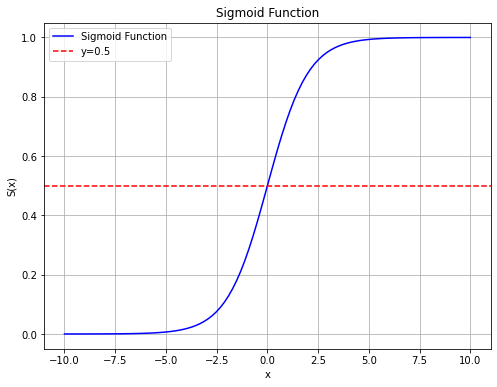

In [18]:
# Plot the sigmoid function

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Sigmoid Function", color="blue")
plt.axhline(0.5, color="red", linestyle="--", label="y=0.5")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Plot the distribution of the 'class' column using a bar plot
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='bar', color=['green', 'purple'], alpha=0.7)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


NameError: name 'class_distribution' is not defined

<Figure size 432x432 with 0 Axes>

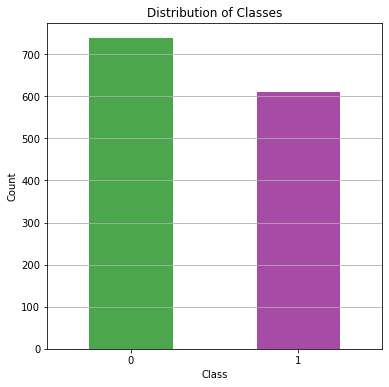

In [20]:
# Recompute the distribution of the 'class' column
class_distribution = data_encoded['class'].value_counts()

# Plot the distribution of the 'class' column using a bar plot
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='bar', color=['green', 'purple'], alpha=0.7)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


In [ ]:
   # Based on excel analysis 
    # Class 0 (green bar): Represents inauthentic banknotes and has around 738 instances.
    # Class 1 (purple bar): Represents authentic banknotes and has 610 instances.

In [21]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = encodedata.drop('class', axis=1)
y = encodedata['class']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape


((1078, 4), (270, 4))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time

# Initialize models
log_reg = LogisticRegression(max_iter=10000)
svm = SVC(probability=True)
decision_tree = DecisionTreeClassifier()

# Dictionary to store results
results = {
    'Model': [],
    'CV Mean Accuracy': [],
    'Computational Time (s)': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# List of models for iteration
models = [('Logistic Regression', log_reg), ('SVM', svm), ('Decision Tree', decision_tree)]

# Train models and record results
for model_name, model in models:
    start_time = time.time()
    
    # k-fold Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    
    # Train the model on full training data
    model.fit(X_train, y_train)
    
    end_time = time.time()
    
    # Record results
    results['Model'].append(model_name)
    results['CV Mean Accuracy'].append(cv_scores.mean())
    results['Computational Time (s)'].append(end_time - start_time)

results


{'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
 'CV Mean Accuracy': [0.9925666320526133,
  0.9981394946348218,
  0.9823641398407753],
 'Computational Time (s)': [0.12599945068359375,
  0.2592635154724121,
  0.06102871894836426],
 'Test Accuracy': [],
 'Precision': [],
 'Recall': [],
 'F1-Score': [],
 'ROC-AUC': []}

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate models on test data and record results
for _, model in models:
    # Predictions
    y_pred = model.predict(X_test)
    
    # Probability estimates are needed for ROC-AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Record performance metrics
    results['Test Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1-Score'].append(f1_score(y_test, y_pred))
    results['ROC-AUC'].append(roc_auc_score(y_test, y_prob))

results


{'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
 'CV Mean Accuracy': [0.9925666320526133,
  0.9981394946348218,
  0.9823641398407753],
 'Computational Time (s)': [0.12599945068359375,
  0.2592635154724121,
  0.06102871894836426],
 'Test Accuracy': [0.9925925925925926, 0.9925925925925926, 0.9814814814814815],
 'Precision': [0.984, 0.984, 0.9609375],
 'Recall': [1.0, 1.0, 1.0],
 'F1-Score': [0.9919354838709677, 0.9919354838709677, 0.9800796812749004],
 'ROC-AUC': [1.0, 1.0, 0.9829931972789115]}

In [24]:
# Convert results to a DataFrame for a clean table representation
results_df = pd.DataFrame(results)
results_df


,Model,CV Mean Accuracy,Computational Time (s),Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.992567,0.125999,0.992593,0.984000,1.0,0.991935,1.000000
1,SVM,0.998139,0.259264,0.992593,0.984000,1.0,0.991935,1.000000
2,Decision Tree,0.982364,0.061029,0.981481,0.960938,1.0,0.980080,0.982993


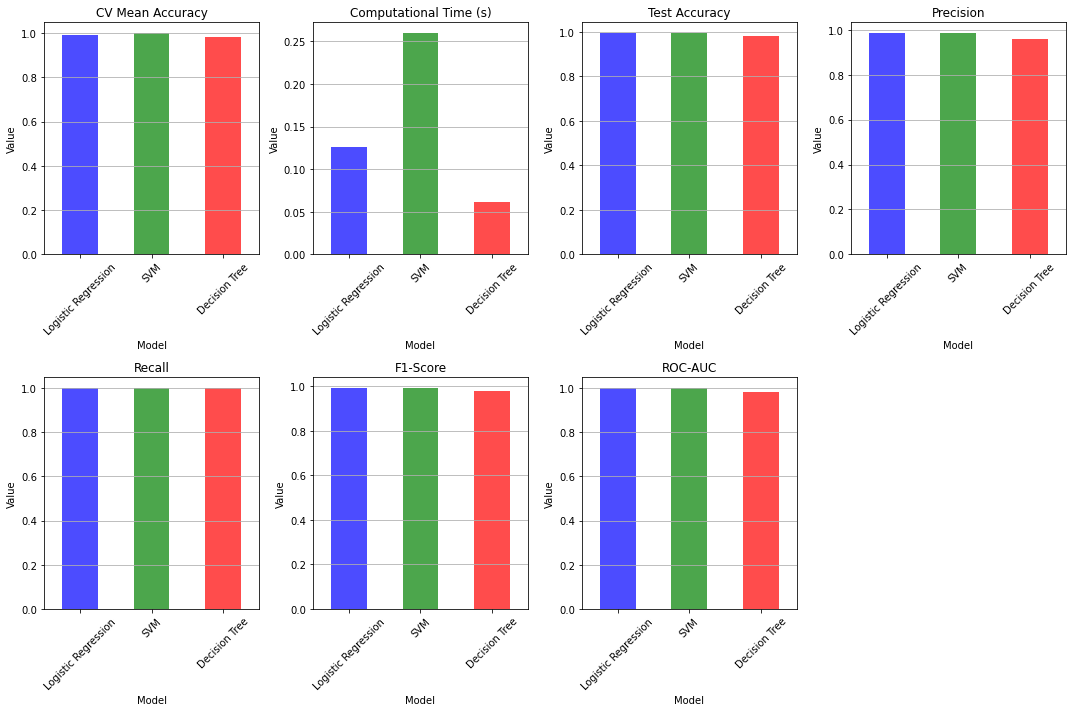

In [25]:
# Visualizing performance metrics with bar plots
metrics = ['CV Mean Accuracy', 'Computational Time (s)', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 4, i)
    results_df.set_index('Model')[metric].plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
    plt.title(metric)
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()
